In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv(r"C:\Users\R Y Z E N\Desktop\WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.dropna(inplace=True)


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


In [11]:
df.drop('customerID', axis=1, inplace=True)



In [12]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [13]:
binary_cols = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling',
    'Churn' 
]

In [14]:
multi_class_cols = [
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaymentMethod'
]

In [15]:
le = LabelEncoder()
for col in binary_cols:
    le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    df['Churn'] = le.fit_transform(df['Churn'])

In [16]:
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

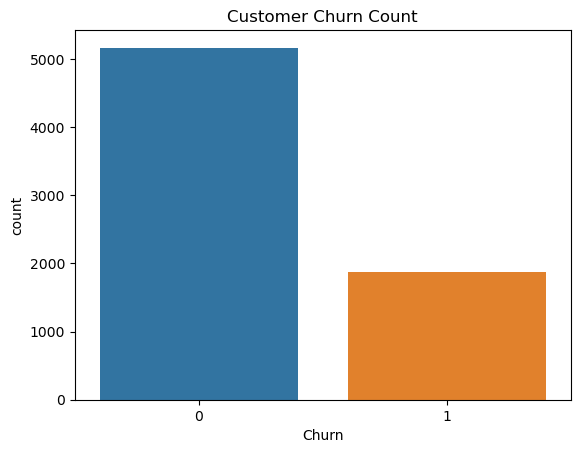

In [17]:
sns.countplot(data=df, x='Churn')
plt.title("Customer Churn Count")
plt.show()


C:\Users\R Y Z E N\.matplotlib\ana1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


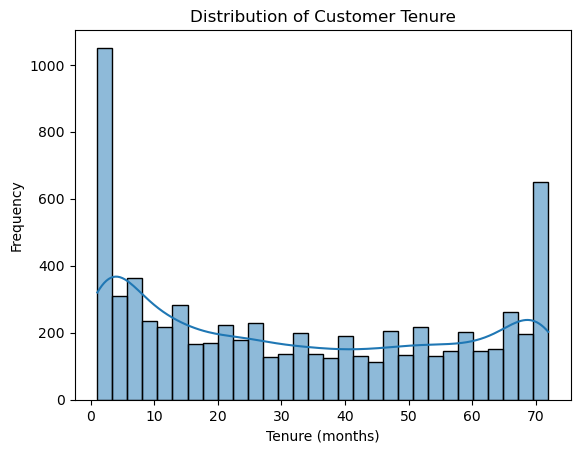

In [18]:
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()


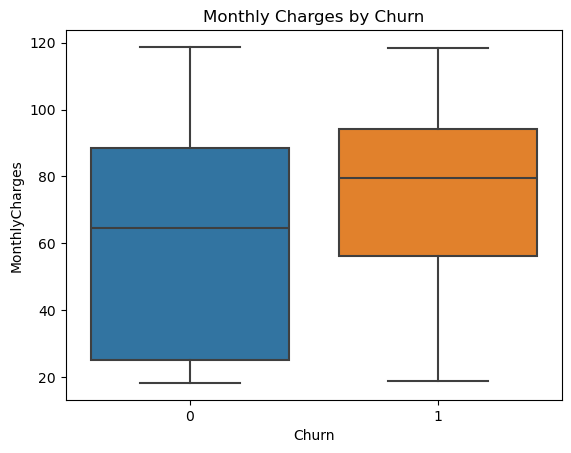

In [19]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn")
plt.show()


In [20]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [21]:
X.shape


(7032, 30)

In [22]:
y.shape

(7032,)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [26]:
print("KNN Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("KNN ACcuracy:", accuracy_score(y_test, y_pred_knn))


KNN Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1549
           1       0.56      0.52      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110

KNN Confusion Matrix:
 [[1316  233]
 [ 267  294]]
KNN ACcuracy: 0.7630331753554502


In [27]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Naive Bayes  Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.92      0.58      0.72      1549
           1       0.43      0.86      0.57       561

    accuracy                           0.66      2110
   macro avg       0.68      0.72      0.64      2110
weighted avg       0.79      0.66      0.68      2110

Naive Bayes Confusion Matrix:
 [[905 644]
 [ 76 485]]
Naive Bayes  Accuracy: 0.6587677725118484


In [28]:
import joblib

joblib.dump(knn, 'knn_model.pkl')

joblib.dump(nb, 'nb_model.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
with open("X_columns.txt", "w") as f:
    f.write("\n".join(X.columns))


In [33]:
import pandas as pd
import joblib
import gradio as gr

# Load models and scaler
knn = joblib.load("knn_model.pkl")
nb = joblib.load("nb_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load expected column structure
with open("X_columns.txt", "r") as f:
    training_columns = f.read().splitlines()

# Preprocessing function
def preprocess_input(input_data):
    # Binary categorical columns to numerical
    binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    for col in binary_cols:
        input_data[col] = input_data[col].apply(lambda x: 1 if str(x).lower() in ['yes', 'male'] else 0)

    # One-hot encode multiclass categorical columns
    multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaymentMethod']
    input_data = pd.get_dummies(input_data, columns=multi_class_cols, drop_first=True)

    # Add any missing columns
    for col in training_columns:
        if col not in input_data.columns:
            input_data[col] = 0

    # Ensure column order matches training
    input_data = input_data[training_columns]
    return scaler.transform(input_data)

# Prediction function
def predict_churn(model_choice, *args):
    try:
        col_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                     'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
                     'Contract', 'PaymentMethod', 'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'MultipleLines']
        
        input_dict = dict(zip(col_names, args))
        input_df = pd.DataFrame([input_dict])

        processed_input = preprocess_input(input_df)

        model = knn if model_choice == "KNN" else nb
        pred = model.predict(processed_input)[0]
        return "✅ Prediction: Churn" if pred == 1 else "✅ Prediction: No Churn"
    
    except Exception as e:
        return f"❌ Error: {str(e)}"

# Gradio input components
inputs = [
    gr.Dropdown(["KNN", "Naive Bayes"], label="Choose Model"),
    gr.Radio(["Male", "Female"], label="Gender"),
    gr.Radio([0, 1], label="Senior Citizen"),
    gr.Radio(["Yes", "No"], label="Partner"),
    gr.Radio(["Yes", "No"], label="Dependents"),
    gr.Slider(0, 72, step=1, label="Tenure"),
    gr.Radio(["Yes", "No"], label="Phone Service"),
    gr.Radio(["Yes", "No"], label="Paperless Billing"),
    gr.Number(label="Monthly Charges"),
    gr.Number(label="Total Charges"),
    gr.Radio(["Month-to-month", "One year", "Two year"], label="Contract"),
    gr.Radio(["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"], label="Payment Method"),
    gr.Radio(["DSL", "Fiber optic", "No"], label="Internet Service"),
    gr.Radio(["Yes", "No", "No internet service"], label="Online Security"),
    gr.Radio(["Yes", "No", "No internet service"], label="Online Backup"),
    gr.Radio(["Yes", "No", "No internet service"], label="Device Protection"),
    gr.Radio(["Yes", "No", "No internet service"], label="Tech Support"),
    gr.Radio(["Yes", "No", "No internet service"], label="Streaming TV"),
    gr.Radio(["Yes", "No", "No internet service"], label="Streaming Movies"),
    gr.Radio(["Yes", "No", "No phone service"], label="Multiple Lines"),
]

# Launch Gradio app
gr.Interface(fn=predict_churn, inputs=inputs, outputs="text", title="Customer Churn Predictor").launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.


In [36]:
import joblib

joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [37]:

joblib.dump(nb, 'nb_model.pkl')

['nb_model.pkl']

In [38]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']